In [37]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests

In [38]:
keys = pd.read_csv("Spotify-Keys.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

### Album 1: Put Up Or Shut Up

In [39]:
PutUp_id = '47boQgN4dboq2f0IcvI4Bt'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(PutUp_id)
PutUp_tracks = requests.get(album_tracks_endpoint, headers = session_header)
PutUp_dict = json.loads(PutUp_tracks.text)
PutUp_track_ids = [x['id'] for x in PutUp_dict['items']]
PutUp_track_ids
PutUp_track_strings = ','.join(str(x) for x in PutUp_track_ids)
PutUp_track_strings
track_features_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(PutUp_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(PutUp_track_strings)
PutUp_features = requests.get(track_features_endpoint, headers = session_header)
PutUp_dict_audio = json.loads(PutUp_features.text)
PutUp_dict_tracks = json.loads(PutUp_features.text)

### I had a hard time getting the tracks data and the audio features. I was able to get one or the other, but not both and I am unsure of what I am doing wrong. 

In [40]:
PutUp_dict_audio['audio_features'][0]

{'danceability': 0.425,
 'energy': 0.852,
 'key': 9,
 'loudness': -6.148,
 'mode': 1,
 'speechiness': 0.122,
 'acousticness': 0.00228,
 'instrumentalness': 0,
 'liveness': 0.0963,
 'valence': 0.431,
 'tempo': 185.021,
 'type': 'audio_features',
 'id': '3j1HTRodSjGtK3YsYMI0XF',
 'uri': 'spotify:track:3j1HTRodSjGtK3YsYMI0XF',
 'track_href': 'https://api.spotify.com/v1/tracks/3j1HTRodSjGtK3YsYMI0XF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3j1HTRodSjGtK3YsYMI0XF',
 'duration_ms': 181027,
 'time_signature': 4}

In [44]:
PutUp_df['album'] = ['PutUp'] * len(PutUp_df.index)

In [45]:
PutUp_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.425,0.852,9,-6.148,1,0.1220,0.002280,0,0.0963,0.431,185.021,audio_features,3j1HTRodSjGtK3YsYMI0XF,spotify:track:3j1HTRodSjGtK3YsYMI0XF,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,https://api.spotify.com/v1/audio-analysis/3j1H...,181027,4,PutUp
1,0.352,0.862,4,-6.521,1,0.0585,0.000042,0,0.2980,0.491,179.769,audio_features,6b23XfrLswilUCsHQHPY1i,spotify:track:6b23XfrLswilUCsHQHPY1i,https://api.spotify.com/v1/tracks/6b23XfrLswil...,https://api.spotify.com/v1/audio-analysis/6b23...,183573,4,PutUp
2,0.253,0.825,7,-6.903,1,0.0573,0.009480,0,0.1140,0.115,172.679,audio_features,5ZEQLXv9F2pKtQrGwMKpMB,spotify:track:5ZEQLXv9F2pKtQrGwMKpMB,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,https://api.spotify.com/v1/audio-analysis/5ZEQ...,218200,4,PutUp
3,0.486,0.901,2,-6.943,1,0.0394,0.000049,0,0.0828,0.353,96.030,audio_features,1oTtOTbcP8waTv4wPsCqSm,spotify:track:1oTtOTbcP8waTv4wPsCqSm,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,https://api.spotify.com/v1/audio-analysis/1oTt...,218293,4,PutUp
4,0.401,0.945,4,-5.984,1,0.2160,0.001880,0,0.3250,0.408,174.953,audio_features,6f7h261u7CPBNFRBYL5Boq,spotify:track:6f7h261u7CPBNFRBYL5Boq,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,https://api.spotify.com/v1/audio-analysis/6f7h...,177840,4,PutUp
5,0.458,0.796,9,-6.993,1,0.0597,0.000959,0,0.3010,0.520,176.944,audio_features,6PTr9xi7S1eZskFIjPNY8e,spotify:track:6PTr9xi7S1eZskFIjPNY8e,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,https://api.spotify.com/v1/audio-analysis/6PTr...,180693,4,PutUp
6,0.286,0.894,4,-6.393,1,0.0950,0.001320,0,0.1070,0.132,104.335,audio_features,0SQheC3TXkqJY6zZbWMv9v,spotify:track:0SQheC3TXkqJY6zZbWMv9v,https://api.spotify.com/v1/tracks/0SQheC3TXkqJ...,https://api.spotify.com/v1/audio-analysis/0SQh...,242973,3,PutUp


## Album 2: So Wrong It's Right

In [46]:
SoWrongItsRight_id = '0H4ELcHequ3OligrjWfrZP'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(SoWrongItsRight_id)
SoWrongItsRight_tracks = requests.get(album_tracks_endpoint, headers = session_header)
SoWrongItsRight_dict = json.loads(SoWrongItsRight_tracks.text)
SoWrongItsRight_track_ids = [x['id'] for x in SoWrongItsRight_dict['items']]
SoWrongItsRight_track_ids
SoWrongItsRight_track_strings = ','.join(str(x) for x in SoWrongItsRight_track_ids)
SoWrongItsRight_track_strings

'2rQSAtxX1yuoWq8ZrvUhpL,4NpzB4z4B0UcajopWE5e6h,3MfRql0HwuxEZzGpoIC832,62wWvHpBOmbGbzkls0Iomo,3xOE5ciDmfQ0VY3WahE0eJ,0JJP0IS4w0fJx01EcrfkDe,5pWqD58cZ9TNvL9WbNfcQ3,2qxXypNXOJZ5qUFdpzJ56n,64WvIOjnquE5dasQ7Kb7Bs,1Nhb2W4BXDTdSbNBw0BxVd,3RtBhVKXnctRgS5Bz61svC,3aCRrvADMjFjZq1x8dWD0t'

In [47]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(SoWrongItsRight_track_strings)

In [48]:
SoWrongItsRight_features = requests.get(track_features_endpoint, headers = session_header)

In [49]:
SoWrongItsRight_dict = json.loads(SoWrongItsRight_features.text)

In [50]:
SoWrongItsRight_dict['audio_features'][0]

{'danceability': 0.312,
 'energy': 0.953,
 'key': 4,
 'loudness': -2.051,
 'mode': 1,
 'speechiness': 0.13,
 'acousticness': 0.0035,
 'instrumentalness': 0,
 'liveness': 0.348,
 'valence': 0.644,
 'tempo': 198.898,
 'type': 'audio_features',
 'id': '2rQSAtxX1yuoWq8ZrvUhpL',
 'uri': 'spotify:track:2rQSAtxX1yuoWq8ZrvUhpL',
 'track_href': 'https://api.spotify.com/v1/tracks/2rQSAtxX1yuoWq8ZrvUhpL',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2rQSAtxX1yuoWq8ZrvUhpL',
 'duration_ms': 149613,
 'time_signature': 4}

In [51]:
SoWrongItsRight_df = pd.DataFrame(SoWrongItsRight_dict['audio_features'])

In [52]:
SoWrongItsRight_df['album'] = ['SoWrongItsRight'] * len(SoWrongItsRight_df.index)

In [53]:
SoWrongItsRight_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.312,0.953,4,-2.051,1,0.1300,0.003500,0,0.3480,0.644,198.898,audio_features,2rQSAtxX1yuoWq8ZrvUhpL,spotify:track:2rQSAtxX1yuoWq8ZrvUhpL,https://api.spotify.com/v1/tracks/2rQSAtxX1yuo...,https://api.spotify.com/v1/audio-analysis/2rQS...,149613,4,SoWrongItsRight
1,0.373,0.952,9,-2.525,1,0.0813,0.002010,0,0.0355,0.592,182.963,audio_features,4NpzB4z4B0UcajopWE5e6h,spotify:track:4NpzB4z4B0UcajopWE5e6h,https://api.spotify.com/v1/tracks/4NpzB4z4B0Uc...,https://api.spotify.com/v1/audio-analysis/4Npz...,180440,4,SoWrongItsRight
2,0.488,0.967,3,-2.701,1,0.0755,0.014700,0,0.1090,0.341,130.928,audio_features,3MfRql0HwuxEZzGpoIC832,spotify:track:3MfRql0HwuxEZzGpoIC832,https://api.spotify.com/v1/tracks/3MfRql0HwuxE...,https://api.spotify.com/v1/audio-analysis/3MfR...,216547,4,SoWrongItsRight
3,0.343,0.944,11,-3.124,1,0.0559,0.000853,0,0.0896,0.482,179.891,audio_features,62wWvHpBOmbGbzkls0Iomo,spotify:track:62wWvHpBOmbGbzkls0Iomo,https://api.spotify.com/v1/tracks/62wWvHpBOmbG...,https://api.spotify.com/v1/audio-analysis/62wW...,231973,4,SoWrongItsRight
4,0.404,0.968,0,-2.211,1,0.1190,0.002300,0,0.1280,0.639,167.012,audio_features,3xOE5ciDmfQ0VY3WahE0eJ,spotify:track:3xOE5ciDmfQ0VY3WahE0eJ,https://api.spotify.com/v1/tracks/3xOE5ciDmfQ0...,https://api.spotify.com/v1/audio-analysis/3xOE...,181720,4,SoWrongItsRight
5,0.459,0.895,2,-3.126,1,0.0805,0.007250,0,0.2060,0.572,181.040,audio_features,0JJP0IS4w0fJx01EcrfkDe,spotify:track:0JJP0IS4w0fJx01EcrfkDe,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,https://api.spotify.com/v1/audio-analysis/0JJP...,182827,4,SoWrongItsRight
6,0.318,0.936,2,-2.522,1,0.0489,0.001710,0,0.0852,0.587,182.996,audio_features,5pWqD58cZ9TNvL9WbNfcQ3,spotify:track:5pWqD58cZ9TNvL9WbNfcQ3,https://api.spotify.com/v1/tracks/5pWqD58cZ9TN...,https://api.spotify.com/v1/audio-analysis/5pWq...,221733,4,SoWrongItsRight
7,0.450,0.602,6,-4.801,0,0.0264,0.150000,0,0.1410,0.316,170.043,audio_features,2qxXypNXOJZ5qUFdpzJ56n,spotify:track:2qxXypNXOJZ5qUFdpzJ56n,https://api.spotify.com/v1/tracks/2qxXypNXOJZ5...,https://api.spotify.com/v1/audio-analysis/2qxX...,256733,3,SoWrongItsRight
8,0.456,0.899,7,-3.799,1,0.0636,0.002680,0,0.2150,0.528,175.054,audio_features,64WvIOjnquE5dasQ7Kb7Bs,spotify:track:64WvIOjnquE5dasQ7Kb7Bs,https://api.spotify.com/v1/tracks/64WvIOjnquE5...,https://api.spotify.com/v1/audio-analysis/64Wv...,169680,4,SoWrongItsRight
9,0.318,0.908,3,-2.286,1,0.0623,0.011900,0,0.0705,0.459,163.973,audio_features,1Nhb2W4BXDTdSbNBw0BxVd,spotify:track:1Nhb2W4BXDTdSbNBw0BxVd,https://api.spotify.com/v1/tracks/1Nhb2W4BXDTd...,https://api.spotify.com/v1/audio-analysis/1Nhb...,214347,4,SoWrongItsRight


### Album 3: Nothing Personal (Deluxe Version)

In [54]:
NothingPersonal_id = '7tY7NcC2gKTxXsTJM6zK5I'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(NothingPersonal_id)
NothingPersonal_tracks = requests.get(album_tracks_endpoint, headers = session_header)
NothingPersonal_dict = json.loads(NothingPersonal_tracks.text)
NothingPersonal_track_ids = [x['id'] for x in NothingPersonal_dict['items']]
NothingPersonal_track_ids
NothingPersonal_track_strings = ','.join(str(x) for x in NothingPersonal_track_ids)
NothingPersonal_track_strings
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(NothingPersonal_track_strings)
NothingPersonal_features = requests.get(track_features_endpoint, headers = session_header)
NothingPersonal_dict = json.loads(NothingPersonal_features.text)

In [55]:
NothingPersonal_dict['audio_features'][0]

{'danceability': 0.497,
 'energy': 0.923,
 'key': 2,
 'loudness': -4.512,
 'mode': 1,
 'speechiness': 0.138,
 'acousticness': 0.00282,
 'instrumentalness': 0,
 'liveness': 0.158,
 'valence': 0.663,
 'tempo': 181.074,
 'type': 'audio_features',
 'id': '0aZJGkkXR3DgaFqo5sB8ot',
 'uri': 'spotify:track:0aZJGkkXR3DgaFqo5sB8ot',
 'track_href': 'https://api.spotify.com/v1/tracks/0aZJGkkXR3DgaFqo5sB8ot',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0aZJGkkXR3DgaFqo5sB8ot',
 'duration_ms': 198000,
 'time_signature': 4}

In [56]:
NothingPersonal_df = pd.DataFrame(NothingPersonal_dict['audio_features'])

In [57]:
NothingPersonal_df['album'] = ['NothingPersonal'] * len(NothingPersonal_df.index)

In [58]:
NothingPersonal_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.497,0.923,2,-4.512,1,0.1380,0.002820,0.000000,0.1580,0.663,181.074,audio_features,0aZJGkkXR3DgaFqo5sB8ot,spotify:track:0aZJGkkXR3DgaFqo5sB8ot,https://api.spotify.com/v1/tracks/0aZJGkkXR3Dg...,https://api.spotify.com/v1/audio-analysis/0aZJ...,198000,4,NothingPersonal
1,0.417,0.951,1,-3.006,1,0.0499,0.002950,0.000000,0.3350,0.643,147.944,audio_features,3d3rJ0qtOU5aNX324mNWfo,spotify:track:3d3rJ0qtOU5aNX324mNWfo,https://api.spotify.com/v1/tracks/3d3rJ0qtOU5a...,https://api.spotify.com/v1/audio-analysis/3d3r...,171707,4,NothingPersonal
2,0.554,0.902,4,-4.019,1,0.0566,0.006360,0.000000,0.3280,0.662,126.021,audio_features,4CDlYQu16nUtVGwgwqj3I3,spotify:track:4CDlYQu16nUtVGwgwqj3I3,https://api.spotify.com/v1/tracks/4CDlYQu16nUt...,https://api.spotify.com/v1/audio-analysis/4CDl...,187000,4,NothingPersonal
3,0.473,0.963,10,-3.795,1,0.0571,0.003090,0.000000,0.2440,0.582,150.033,audio_features,2WO1QXoR1o0R1rYKAxF7Ya,spotify:track:2WO1QXoR1o0R1rYKAxF7Ya,https://api.spotify.com/v1/tracks/2WO1QXoR1o0R...,https://api.spotify.com/v1/audio-analysis/2WO1...,227467,4,NothingPersonal
4,0.498,0.945,5,-3.555,1,0.0372,0.025000,0.000000,0.2780,0.559,81.508,audio_features,6hmEzWnA6ny2rqVOpB5Hcb,spotify:track:6hmEzWnA6ny2rqVOpB5Hcb,https://api.spotify.com/v1/tracks/6hmEzWnA6ny2...,https://api.spotify.com/v1/audio-analysis/6hmE...,204307,4,NothingPersonal
5,0.483,0.776,11,-4.416,0,0.0334,0.002390,0.000000,0.3180,0.378,96.953,audio_features,0iQ8rIFYUUJtCV20smTEHR,spotify:track:0iQ8rIFYUUJtCV20smTEHR,https://api.spotify.com/v1/tracks/0iQ8rIFYUUJt...,https://api.spotify.com/v1/audio-analysis/0iQ8...,216013,4,NothingPersonal
6,0.496,0.893,9,-3.201,1,0.0705,0.072500,0.000000,0.0644,0.731,148.015,audio_features,3BuArnDZqzmnSr7S0CpQfb,spotify:track:3BuArnDZqzmnSr7S0CpQfb,https://api.spotify.com/v1/tracks/3BuArnDZqzmn...,https://api.spotify.com/v1/audio-analysis/3BuA...,209813,4,NothingPersonal
7,0.489,0.967,7,-3.168,1,0.1510,0.007950,0.000000,0.0616,0.397,153.034,audio_features,35CC1Zlq9bvr3TkZtnOAv7,spotify:track:35CC1Zlq9bvr3TkZtnOAv7,https://api.spotify.com/v1/tracks/35CC1Zlq9bvr...,https://api.spotify.com/v1/audio-analysis/35CC...,191173,4,NothingPersonal
8,0.580,0.812,8,-4.868,1,0.0429,0.046100,0.000000,0.0968,0.364,120.012,audio_features,5CKVI4DEqIpfebT6kIWHf3,spotify:track:5CKVI4DEqIpfebT6kIWHf3,https://api.spotify.com/v1/tracks/5CKVI4DEqIpf...,https://api.spotify.com/v1/audio-analysis/5CKV...,254933,4,NothingPersonal
9,0.396,0.985,4,-2.800,1,0.1280,0.003300,0.000000,0.4810,0.517,166.016,audio_features,035SyYaZBffdxtuHRPE5SD,spotify:track:035SyYaZBffdxtuHRPE5SD,https://api.spotify.com/v1/tracks/035SyYaZBffd...,https://api.spotify.com/v1/audio-analysis/035S...,200133,4,NothingPersonal


### Album 4: Dirty Work

In [59]:
DirtyWork_id = '2LJKiBomrpmLQhCZmNLrP8'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(DirtyWork_id)
DirtyWork_tracks = requests.get(album_tracks_endpoint, headers = session_header)
DirtyWork_dict = json.loads(DirtyWork_tracks.text)
DirtyWork_track_ids = [x['id'] for x in DirtyWork_dict['items']]
DirtyWork_track_ids
DirtyWork_track_strings = ','.join(str(x) for x in DirtyWork_track_ids)
DirtyWork_track_strings
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(DirtyWork_track_strings)
DirtyWork_features = requests.get(track_features_endpoint, headers = session_header)
DirtyWork_dict = json.loads(DirtyWork_features.text)

In [60]:
DirtyWork_dict['audio_features'][0]

{'danceability': 0.555,
 'energy': 0.98,
 'key': 5,
 'loudness': -2.384,
 'mode': 1,
 'speechiness': 0.0619,
 'acousticness': 0.000871,
 'instrumentalness': 0,
 'liveness': 0.264,
 'valence': 0.529,
 'tempo': 133.066,
 'type': 'audio_features',
 'id': '0jIctjcQRcF1UBDWtJi290',
 'uri': 'spotify:track:0jIctjcQRcF1UBDWtJi290',
 'track_href': 'https://api.spotify.com/v1/tracks/0jIctjcQRcF1UBDWtJi290',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jIctjcQRcF1UBDWtJi290',
 'duration_ms': 164947,
 'time_signature': 4}

In [61]:
DirtyWork_df = pd.DataFrame(DirtyWork_dict['audio_features'])

In [62]:
DirtyWork_df['album'] = ['DirtyWork'] * len(DirtyWork_df.index)

In [63]:
DirtyWork_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.555,0.980,5,-2.384,1,0.0619,0.000871,0.000000,0.2640,0.529,133.066,audio_features,0jIctjcQRcF1UBDWtJi290,spotify:track:0jIctjcQRcF1UBDWtJi290,https://api.spotify.com/v1/tracks/0jIctjcQRcF1...,https://api.spotify.com/v1/audio-analysis/0jIc...,164947,4,DirtyWork
1,0.512,0.947,1,-2.730,0,0.0817,0.006330,0.000000,0.0613,0.553,184.005,audio_features,3PMcBzxNMaW4cVX7FKXwwA,spotify:track:3PMcBzxNMaW4cVX7FKXwwA,https://api.spotify.com/v1/tracks/3PMcBzxNMaW4...,https://api.spotify.com/v1/audio-analysis/3PMc...,180600,4,DirtyWork
2,0.624,0.928,4,-3.022,1,0.0575,0.011300,0.000000,0.1020,0.671,132.045,audio_features,3LFzVLgW5N9RYirdQOOPX8,spotify:track:3LFzVLgW5N9RYirdQOOPX8,https://api.spotify.com/v1/tracks/3LFzVLgW5N9R...,https://api.spotify.com/v1/audio-analysis/3LFz...,169227,4,DirtyWork
3,0.411,0.970,11,-2.860,0,0.1070,0.004550,0.000000,0.1290,0.488,180.023,audio_features,7xapl7fsqoJU4p0mQVOSm0,spotify:track:7xapl7fsqoJU4p0mQVOSm0,https://api.spotify.com/v1/tracks/7xapl7fsqoJU...,https://api.spotify.com/v1/audio-analysis/7xap...,197053,3,DirtyWork
4,0.520,0.911,11,-3.945,0,0.0550,0.003880,0.000002,0.3400,0.614,139.046,audio_features,2qqn52sp9dDk2F9PdTrpwZ,spotify:track:2qqn52sp9dDk2F9PdTrpwZ,https://api.spotify.com/v1/tracks/2qqn52sp9dDk...,https://api.spotify.com/v1/audio-analysis/2qqn...,209933,4,DirtyWork
5,0.578,0.954,2,-3.668,1,0.1170,0.030000,0.000000,0.3250,0.587,91.037,audio_features,00SsZ9KAuNQBUYfqRbxBn4,spotify:track:00SsZ9KAuNQBUYfqRbxBn4,https://api.spotify.com/v1/tracks/00SsZ9KAuNQB...,https://api.spotify.com/v1/audio-analysis/00Ss...,196773,4,DirtyWork
6,0.477,0.991,4,-2.433,1,0.0923,0.001830,0.000000,0.3040,0.560,152.940,audio_features,2LhR8HU0lswjen4LYVMpsZ,spotify:track:2LhR8HU0lswjen4LYVMpsZ,https://api.spotify.com/v1/tracks/2LhR8HU0lswj...,https://api.spotify.com/v1/audio-analysis/2LhR...,181120,4,DirtyWork
7,0.406,0.947,9,-3.307,0,0.0944,0.017900,0.000000,0.1060,0.269,160.769,audio_features,5X5r8ZUSMaLFfm5zQpaY1R,spotify:track:5X5r8ZUSMaLFfm5zQpaY1R,https://api.spotify.com/v1/tracks/5X5r8ZUSMaLF...,https://api.spotify.com/v1/audio-analysis/5X5r...,220160,4,DirtyWork
8,0.502,0.815,1,-4.514,1,0.0388,0.007050,0.000000,0.1960,0.475,111.005,audio_features,7Aoyeqo8DFDN8sXC51jQbH,spotify:track:7Aoyeqo8DFDN8sXC51jQbH,https://api.spotify.com/v1/tracks/7Aoyeqo8DFDN...,https://api.spotify.com/v1/audio-analysis/7Aoy...,263253,4,DirtyWork
9,0.536,0.713,2,-4.348,1,0.0294,0.060000,0.000003,0.1010,0.547,169.864,audio_features,3ShzFbJSRNntv62XqTW50Q,spotify:track:3ShzFbJSRNntv62XqTW50Q,https://api.spotify.com/v1/tracks/3ShzFbJSRNnt...,https://api.spotify.com/v1/audio-analysis/3Shz...,251867,4,DirtyWork


### Album 5: Don't Panic: It's Longer Now

In [64]:
DontPanic_id = '7b3JowMC8FK0nToMlD4H1d'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(DontPanic_id)
DontPanic_tracks = requests.get(album_tracks_endpoint, headers = session_header)
DontPanic_dict = json.loads(DontPanic_tracks.text)
DontPanic_track_ids = [x['id'] for x in DontPanic_dict['items']]
DontPanic_track_ids
DontPanic_track_strings = ','.join(str(x) for x in DontPanic_track_ids)
DirtyWork_track_strings
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(DontPanic_track_strings)
DontPanic_features = requests.get(track_features_endpoint, headers = session_header)
DontPanic_dict = json.loads(DontPanic_features.text)

In [65]:
DontPanic_dict['audio_features'][0]

{'danceability': 0.459,
 'energy': 0.993,
 'key': 1,
 'loudness': -2.365,
 'mode': 1,
 'speechiness': 0.126,
 'acousticness': 0.000299,
 'instrumentalness': 0,
 'liveness': 0.214,
 'valence': 0.642,
 'tempo': 160.108,
 'type': 'audio_features',
 'id': '0aZ3B64WcYtvzvTz6GE7xT',
 'uri': 'spotify:track:0aZ3B64WcYtvzvTz6GE7xT',
 'track_href': 'https://api.spotify.com/v1/tracks/0aZ3B64WcYtvzvTz6GE7xT',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0aZ3B64WcYtvzvTz6GE7xT',
 'duration_ms': 198925,
 'time_signature': 4}

In [66]:
DontPanic_df = pd.DataFrame(DontPanic_dict['audio_features'])

In [67]:
DontPanic_df['album'] = ['DontPanic'] * len(DontPanic_df.index)

In [68]:
DontPanic_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.459,0.993,1,-2.365,1,0.1260,0.000299,0.000000,0.2140,0.642,160.108,audio_features,0aZ3B64WcYtvzvTz6GE7xT,spotify:track:0aZ3B64WcYtvzvTz6GE7xT,https://api.spotify.com/v1/tracks/0aZ3B64WcYtv...,https://api.spotify.com/v1/audio-analysis/0aZ3...,198925,4,DontPanic
1,0.475,0.987,5,-3.515,0,0.1210,0.000280,0.000002,0.3350,0.632,162.005,audio_features,0TPF6uW7fhMXJPoBERqTy5,spotify:track:0TPF6uW7fhMXJPoBERqTy5,https://api.spotify.com/v1/tracks/0TPF6uW7fhMX...,https://api.spotify.com/v1/audio-analysis/0TPF...,213741,4,DontPanic
2,0.511,0.964,6,-3.712,1,0.0451,0.000059,0.000033,0.1720,0.546,140.050,audio_features,7dv7zzot4FkA9ovZ51yWyE,spotify:track:7dv7zzot4FkA9ovZ51yWyE,https://api.spotify.com/v1/tracks/7dv7zzot4FkA...,https://api.spotify.com/v1/audio-analysis/7dv7...,200510,4,DontPanic
3,0.436,0.977,2,-4.091,1,0.1050,0.000073,0.000139,0.3090,0.586,165.902,audio_features,1eMQ6C3nwItabEqSZocs4H,spotify:track:1eMQ6C3nwItabEqSZocs4H,https://api.spotify.com/v1/tracks/1eMQ6C3nwIta...,https://api.spotify.com/v1/audio-analysis/1eMQ...,213097,4,DontPanic
4,0.423,0.980,7,-3.538,1,0.0717,0.000097,0.000000,0.2880,0.593,175.154,audio_features,677GXVOkJpd6VEfsMJJuEM,spotify:track:677GXVOkJpd6VEfsMJJuEM,https://api.spotify.com/v1/tracks/677GXVOkJpd6...,https://api.spotify.com/v1/audio-analysis/677G...,199405,4,DontPanic
5,0.572,0.983,8,-2.848,1,0.0828,0.000161,0.000005,0.3120,0.552,127.970,audio_features,1mYxMInBaaOcCqEaOc5FWg,spotify:track:1mYxMInBaaOcCqEaOc5FWg,https://api.spotify.com/v1/tracks/1mYxMInBaaOc...,https://api.spotify.com/v1/audio-analysis/1mYx...,225293,4,DontPanic
6,0.405,0.979,4,-3.159,1,0.2130,0.000128,0.000003,0.0743,0.334,190.098,audio_features,1DRNpWJUK7ycfhplV76HGq,spotify:track:1DRNpWJUK7ycfhplV76HGq,https://api.spotify.com/v1/tracks/1DRNpWJUK7yc...,https://api.spotify.com/v1/audio-analysis/1DRN...,169015,4,DontPanic
7,0.572,0.982,2,-3.218,1,0.0765,0.000182,0.000000,0.0629,0.642,132.032,audio_features,6WM8fnjZKo7aq6LHWm0dOP,spotify:track:6WM8fnjZKo7aq6LHWm0dOP,https://api.spotify.com/v1/tracks/6WM8fnjZKo7a...,https://api.spotify.com/v1/audio-analysis/6WM8...,202088,4,DontPanic
8,0.427,0.986,6,-3.232,1,0.0857,0.002280,0.000000,0.3110,0.619,178.224,audio_features,5hYu1CLzyRxL2jYV0UlhzM,spotify:track:5hYu1CLzyRxL2jYV0UlhzM,https://api.spotify.com/v1/tracks/5hYu1CLzyRxL...,https://api.spotify.com/v1/audio-analysis/5hYu...,216686,4,DontPanic
9,0.406,0.987,6,-2.955,1,0.0629,0.000161,0.000000,0.2160,0.662,175.010,audio_features,1qi9S1UgCCRuZjFfIAYU4W,spotify:track:1qi9S1UgCCRuZjFfIAYU4W,https://api.spotify.com/v1/tracks/1qi9S1UgCCRu...,https://api.spotify.com/v1/audio-analysis/1qi9...,223310,3,DontPanic


### Album 6: Future Hearts

In [69]:
FutureHearts_id = '712X8QUI6uWg1JxHmz0l4I'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(FutureHearts_id)
FutureHearts_tracks = requests.get(album_tracks_endpoint, headers = session_header)
FutureHearts_dict = json.loads(FutureHearts_tracks.text)
FutureHearts_track_ids = [x['id'] for x in FutureHearts_dict['items']]
FutureHearts_track_ids
FutureHearts_track_strings = ','.join(str(x) for x in FutureHearts_track_ids)
FutureHearts_track_strings
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(FutureHearts_track_strings)
FutureHearts_features = requests.get(track_features_endpoint, headers = session_header)
FutureHearts_dict = json.loads(FutureHearts_features.text)

In [70]:
FutureHearts_dict['audio_features'][0]

{'danceability': 0.442,
 'energy': 0.842,
 'key': 2,
 'loudness': -6.101,
 'mode': 1,
 'speechiness': 0.0606,
 'acousticness': 0.0758,
 'instrumentalness': 1.84e-06,
 'liveness': 0.403,
 'valence': 0.318,
 'tempo': 72.558,
 'type': 'audio_features',
 'id': '5iN7ZEHuZIHMPxQ9Eb8RXN',
 'uri': 'spotify:track:5iN7ZEHuZIHMPxQ9Eb8RXN',
 'track_href': 'https://api.spotify.com/v1/tracks/5iN7ZEHuZIHMPxQ9Eb8RXN',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5iN7ZEHuZIHMPxQ9Eb8RXN',
 'duration_ms': 144649,
 'time_signature': 4}

In [71]:
FutureHearts_df = pd.DataFrame(FutureHearts_dict['audio_features'])

In [72]:
FutureHearts_df['album'] = ['FutureHearts'] * len(FutureHearts_df.index)

In [73]:
FutureHearts_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.442,0.842,2,-6.101,1,0.0606,0.075800,0.000002,0.4030,0.318,72.558,audio_features,5iN7ZEHuZIHMPxQ9Eb8RXN,spotify:track:5iN7ZEHuZIHMPxQ9Eb8RXN,https://api.spotify.com/v1/tracks/5iN7ZEHuZIHM...,https://api.spotify.com/v1/audio-analysis/5iN7...,144649,4,FutureHearts
1,0.403,0.995,6,-3.007,1,0.1110,0.000097,0.001050,0.3330,0.374,165.028,audio_features,7trmqDnI68Vfa6qiFAumeT,spotify:track:7trmqDnI68Vfa6qiFAumeT,https://api.spotify.com/v1/tracks/7trmqDnI68Vf...,https://api.spotify.com/v1/audio-analysis/7trm...,206084,4,FutureHearts
2,0.496,0.913,4,-3.286,1,0.0449,0.010100,0.000000,0.1180,0.675,165.986,audio_features,1SeefzwSDiFCjRWaBslRIj,spotify:track:1SeefzwSDiFCjRWaBslRIj,https://api.spotify.com/v1/tracks/1SeefzwSDiFC...,https://api.spotify.com/v1/audio-analysis/1See...,189418,4,FutureHearts
3,0.519,0.981,1,-3.472,0,0.0733,0.001370,0.000164,0.0903,0.765,130.043,audio_features,50oS45iNMFp7pKIQRAWIUP,spotify:track:50oS45iNMFp7pKIQRAWIUP,https://api.spotify.com/v1/tracks/50oS45iNMFp7...,https://api.spotify.com/v1/audio-analysis/50oS...,216689,4,FutureHearts
4,0.510,0.984,4,-4.126,1,0.1290,0.006040,0.000000,0.0705,0.359,137.988,audio_features,60d8m5JYa6vHGg8hPFBZwQ,spotify:track:60d8m5JYa6vHGg8hPFBZwQ,https://api.spotify.com/v1/tracks/60d8m5JYa6vH...,https://api.spotify.com/v1/audio-analysis/60d8...,214878,4,FutureHearts
5,0.560,0.731,2,-6.121,1,0.0281,0.047200,0.000000,0.2820,0.400,99.978,audio_features,0LSY3NePenK0VG7nRUTVk8,spotify:track:0LSY3NePenK0VG7nRUTVk8,https://api.spotify.com/v1/tracks/0LSY3NePenK0...,https://api.spotify.com/v1/audio-analysis/0LSY...,244824,4,FutureHearts
6,0.490,0.966,7,-3.677,1,0.1060,0.011100,0.000008,0.2010,0.593,157.942,audio_features,4pVa7HzXbi4LZ8voROSZmy,spotify:track:4pVa7HzXbi4LZ8voROSZmy,https://api.spotify.com/v1/tracks/4pVa7HzXbi4L...,https://api.spotify.com/v1/audio-analysis/4pVa...,215796,4,FutureHearts
7,0.220,0.873,2,-4.364,1,0.0526,0.028500,0.000000,0.1100,0.360,73.274,audio_features,2CmZ0haTZB1Y1SCcFRu85Z,spotify:track:2CmZ0haTZB1Y1SCcFRu85Z,https://api.spotify.com/v1/tracks/2CmZ0haTZB1Y...,https://api.spotify.com/v1/audio-analysis/2CmZ...,249611,4,FutureHearts
8,0.467,0.924,10,-4.294,1,0.2300,0.017400,0.000000,0.0745,0.588,180.093,audio_features,52DDgK0wy9NnKMrw4A7MAJ,spotify:track:52DDgK0wy9NnKMrw4A7MAJ,https://api.spotify.com/v1/tracks/52DDgK0wy9Nn...,https://api.spotify.com/v1/audio-analysis/52DD...,185735,4,FutureHearts
9,0.698,0.906,1,-3.921,1,0.0471,0.003780,0.000027,0.2340,0.964,127.044,audio_features,6CbDkmeFkd994Jx33xpg2Y,spotify:track:6CbDkmeFkd994Jx33xpg2Y,https://api.spotify.com/v1/tracks/6CbDkmeFkd99...,https://api.spotify.com/v1/audio-analysis/6CbD...,212951,4,FutureHearts


### Album 7: Last Young Renegade

In [74]:
LastYoungRenegade_id = '0gpNGTVNivS2wB32tzV3OH'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(LastYoungRenegade_id)
LastYoungRenegade_tracks = requests.get(album_tracks_endpoint, headers = session_header)
LastYoungRenegade_dict = json.loads(LastYoungRenegade_tracks.text)
LastYoungRenegade_track_ids = [x['id'] for x in LastYoungRenegade_dict['items']]
LastYoungRenegade_track_ids
LastYoungRenegade_track_strings = ','.join(str(x) for x in LastYoungRenegade_track_ids)
LastYoungRenegade_track_strings
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(LastYoungRenegade_track_strings)
LastYoungRenegade_features = requests.get(track_features_endpoint, headers = session_header)
LastYoungRenegade_dict = json.loads(LastYoungRenegade_features.text)

In [75]:
LastYoungRenegade_dict['audio_features'][0]

{'danceability': 0.582,
 'energy': 0.843,
 'key': 2,
 'loudness': -5.596,
 'mode': 1,
 'speechiness': 0.0401,
 'acousticness': 0.00111,
 'instrumentalness': 0,
 'liveness': 0.102,
 'valence': 0.446,
 'tempo': 128.994,
 'type': 'audio_features',
 'id': '66hOCG7IpEJI5wfLDhajxD',
 'uri': 'spotify:track:66hOCG7IpEJI5wfLDhajxD',
 'track_href': 'https://api.spotify.com/v1/tracks/66hOCG7IpEJI5wfLDhajxD',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/66hOCG7IpEJI5wfLDhajxD',
 'duration_ms': 214093,
 'time_signature': 4}

In [76]:
LastYoungRenegade_df = pd.DataFrame(LastYoungRenegade_dict['audio_features'])

In [77]:
LastYoungRenegade_df['album'] = ['LastYoungRenegade'] * len(LastYoungRenegade_df.index)

In [78]:
LastYoungRenegade_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.582,0.843,2,-5.596,1,0.0401,0.001110,0.000000,0.1020,0.446,128.994,audio_features,66hOCG7IpEJI5wfLDhajxD,spotify:track:66hOCG7IpEJI5wfLDhajxD,https://api.spotify.com/v1/tracks/66hOCG7IpEJI...,https://api.spotify.com/v1/audio-analysis/66hO...,214093,4,LastYoungRenegade
1,0.490,0.868,10,-3.943,1,0.0375,0.048600,0.000000,0.0575,0.472,147.979,audio_features,1isQMKYmpvJ4tOP8R2qkWr,spotify:track:1isQMKYmpvJ4tOP8R2qkWr,https://api.spotify.com/v1/tracks/1isQMKYmpvJ4...,https://api.spotify.com/v1/audio-analysis/1isQ...,217680,4,LastYoungRenegade
2,0.560,0.751,4,-6.022,0,0.0364,0.001680,0.000052,0.1680,0.177,93.969,audio_features,7GZKme55JpmLq3alBDQm11,spotify:track:7GZKme55JpmLq3alBDQm11,https://api.spotify.com/v1/tracks/7GZKme55JpmL...,https://api.spotify.com/v1/audio-analysis/7GZK...,197640,4,LastYoungRenegade
3,0.560,0.887,7,-6.314,1,0.0594,0.003880,0.000000,0.3410,0.198,130.026,audio_features,3aAoy02NwrmZcqXYYjqNh2,spotify:track:3aAoy02NwrmZcqXYYjqNh2,https://api.spotify.com/v1/tracks/3aAoy02NwrmZ...,https://api.spotify.com/v1/audio-analysis/3aAo...,224947,4,LastYoungRenegade
4,0.462,0.952,5,-5.011,0,0.0529,0.000158,0.000192,0.0663,0.456,169.910,audio_features,4BpSuJ9GPFb4lNNNsOktws,spotify:track:4BpSuJ9GPFb4lNNNsOktws,https://api.spotify.com/v1/tracks/4BpSuJ9GPFb4...,https://api.spotify.com/v1/audio-analysis/4BpS...,196507,4,LastYoungRenegade
5,0.553,0.830,6,-5.697,0,0.0380,0.000098,0.000000,0.3430,0.236,101.994,audio_features,4pcyWJiAvOwdVxn7xjhR0N,spotify:track:4pcyWJiAvOwdVxn7xjhR0N,https://api.spotify.com/v1/tracks/4pcyWJiAvOwd...,https://api.spotify.com/v1/audio-analysis/4pcy...,205307,4,LastYoungRenegade
6,0.537,0.624,0,-5.873,1,0.0288,0.075500,0.000000,0.1380,0.468,135.987,audio_features,0LJp1imLp25L6loDVPDMGn,spotify:track:0LJp1imLp25L6loDVPDMGn,https://api.spotify.com/v1/tracks/0LJp1imLp25L...,https://api.spotify.com/v1/audio-analysis/0LJp...,247773,4,LastYoungRenegade
7,0.515,0.780,5,-5.851,1,0.0478,0.000724,0.000007,0.0649,0.501,130.005,audio_features,0ergYUxazsLy0qWK3h0YJd,spotify:track:0ergYUxazsLy0qWK3h0YJd,https://api.spotify.com/v1/tracks/0ergYUxazsLy...,https://api.spotify.com/v1/audio-analysis/0erg...,206307,4,LastYoungRenegade
8,0.640,0.782,9,-6.562,1,0.0352,0.004000,0.000033,0.5320,0.393,114.957,audio_features,2fF3XzFS37084kw9tgNA5i,spotify:track:2fF3XzFS37084kw9tgNA5i,https://api.spotify.com/v1/tracks/2fF3XzFS3708...,https://api.spotify.com/v1/audio-analysis/2fF3...,236307,4,LastYoungRenegade
9,0.580,0.629,2,-7.296,1,0.0391,0.029000,0.000002,0.0888,0.304,97.971,audio_features,4nou22UEIrqNbtS9ZY3wjL,spotify:track:4nou22UEIrqNbtS9ZY3wjL,https://api.spotify.com/v1/tracks/4nou22UEIrqN...,https://api.spotify.com/v1/audio-analysis/4nou...,243560,4,LastYoungRenegade


### Album 8: Wake Up Sunshine

In [79]:
WakeUpSunshine_id = '1kwAv74rVTTGMpawGsXtiE'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(WakeUpSunshine_id)
WakeUpSunshine_tracks = requests.get(album_tracks_endpoint, headers = session_header)
WakeUpSunshine_dict = json.loads(WakeUpSunshine_tracks.text)
WakeUpSunshine_track_ids = [x['id'] for x in WakeUpSunshine_dict['items']]
WakeUpSunshine_track_ids
WakeUpSunshine_track_strings = ','.join(str(x) for x in WakeUpSunshine_track_ids)
WakeUpSunshine_track_strings  
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(WakeUpSunshine_track_strings)
WakeUpSunshine_features = requests.get(track_features_endpoint, headers = session_header)
WakeUpSunshine_dict = json.loads(WakeUpSunshine_features.text)


In [80]:
WakeUpSunshine_dict['audio_features'][0]

{'danceability': 0.55,
 'energy': 0.837,
 'key': 11,
 'loudness': -5.411,
 'mode': 1,
 'speechiness': 0.044,
 'acousticness': 0.0104,
 'instrumentalness': 0,
 'liveness': 0.306,
 'valence': 0.637,
 'tempo': 89.821,
 'type': 'audio_features',
 'id': '02lU0Hj680zVexT4GqJJZ4',
 'uri': 'spotify:track:02lU0Hj680zVexT4GqJJZ4',
 'track_href': 'https://api.spotify.com/v1/tracks/02lU0Hj680zVexT4GqJJZ4',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/02lU0Hj680zVexT4GqJJZ4',
 'duration_ms': 223994,
 'time_signature': 4}

In [81]:
WakeUpSunshine_df = pd.DataFrame(WakeUpSunshine_dict['audio_features'])

In [82]:
WakeUpSunshine_df['album'] = ['WakeUpSunshine'] * len(WakeUpSunshine_df.index)

In [83]:
WakeUpSunshine_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.550,0.837,11,-5.411,1,0.0440,0.010400,0.000000,0.3060,0.637,89.821,audio_features,02lU0Hj680zVexT4GqJJZ4,spotify:track:02lU0Hj680zVexT4GqJJZ4,https://api.spotify.com/v1/tracks/02lU0Hj680zV...,https://api.spotify.com/v1/audio-analysis/02lU...,223994,4,WakeUpSunshine
1,0.656,0.955,7,-3.842,1,0.0462,0.008650,0.000000,0.3420,0.558,105.031,audio_features,402Ecma69MRxeQK6ml6YbI,spotify:track:402Ecma69MRxeQK6ml6YbI,https://api.spotify.com/v1/tracks/402Ecma69MRx...,https://api.spotify.com/v1/audio-analysis/402E...,180599,4,WakeUpSunshine
2,0.556,0.899,4,-3.372,1,0.0711,0.002510,0.000000,0.0800,0.831,102.056,audio_features,6lMPUipRF49L8AxLW3F40B,spotify:track:6lMPUipRF49L8AxLW3F40B,https://api.spotify.com/v1/tracks/6lMPUipRF49L...,https://api.spotify.com/v1/audio-analysis/6lMP...,167042,4,WakeUpSunshine
3,0.643,0.927,2,-2.820,1,0.0533,0.001930,0.000000,0.1030,0.682,102.037,audio_features,1wQsTZ4AxGoXB9FmD9Nf4o,spotify:track:1wQsTZ4AxGoXB9FmD9Nf4o,https://api.spotify.com/v1/tracks/1wQsTZ4AxGoX...,https://api.spotify.com/v1/audio-analysis/1wQs...,174895,4,WakeUpSunshine
4,0.511,0.903,6,-4.194,0,0.0685,0.000707,0.000000,0.0725,0.882,175.021,audio_features,4nOi9YbtFt7e9I4bbI1FKd,spotify:track:4nOi9YbtFt7e9I4bbI1FKd,https://api.spotify.com/v1/tracks/4nOi9YbtFt7e...,https://api.spotify.com/v1/audio-analysis/4nOi...,147060,3,WakeUpSunshine
5,0.508,0.951,11,-2.750,1,0.0709,0.001250,0.000000,0.2000,0.466,146.048,audio_features,0xUvmXH7JO3klazeWlOyup,spotify:track:0xUvmXH7JO3klazeWlOyup,https://api.spotify.com/v1/tracks/0xUvmXH7JO3k...,https://api.spotify.com/v1/audio-analysis/0xUv...,196193,4,WakeUpSunshine
6,0.369,0.845,0,-3.449,0,0.0611,0.049300,0.000000,0.4160,0.782,78.532,audio_features,0tyR7Bu9P086aWBFZ4QJoo,spotify:track:0tyR7Bu9P086aWBFZ4QJoo,https://api.spotify.com/v1/tracks/0tyR7Bu9P086...,https://api.spotify.com/v1/audio-analysis/0tyR...,174068,4,WakeUpSunshine
7,0.686,0.591,3,-8.365,1,0.0450,0.569000,0.000813,0.3660,0.465,129.015,audio_features,2nZ3LmQbY2rEd4awJVkQpd,spotify:track:2nZ3LmQbY2rEd4awJVkQpd,https://api.spotify.com/v1/tracks/2nZ3LmQbY2rE...,https://api.spotify.com/v1/audio-analysis/2nZ3...,182451,4,WakeUpSunshine
8,0.598,0.886,8,-4.203,1,0.0412,0.000588,0.000048,0.0264,0.648,129.972,audio_features,2uVNn2pFpDlx1XrFcEfary,spotify:track:2uVNn2pFpDlx1XrFcEfary,https://api.spotify.com/v1/tracks/2uVNn2pFpDlx...,https://api.spotify.com/v1/audio-analysis/2uVN...,193949,4,WakeUpSunshine
9,0.583,0.859,1,-3.568,1,0.0432,0.002360,0.000000,0.1900,0.483,122.976,audio_features,3IDgkcLETJkpp43cad5SwB,spotify:track:3IDgkcLETJkpp43cad5SwB,https://api.spotify.com/v1/tracks/3IDgkcLETJkp...,https://api.spotify.com/v1/audio-analysis/3IDg...,220121,4,WakeUpSunshine


In [84]:
audio_features = pd.concat([PutUp_df, SoWrongItsRight_df, NothingPersonal_df, DirtyWork_df, DontPanic_df, FutureHearts_df, LastYoungRenegade_df, WakeUpSunshine_df ])

In [85]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.425,0.852,9,-6.148,1,0.1220,0.002280,0.00000,0.0963,0.431,185.021,audio_features,3j1HTRodSjGtK3YsYMI0XF,spotify:track:3j1HTRodSjGtK3YsYMI0XF,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,https://api.spotify.com/v1/audio-analysis/3j1H...,181027,4,PutUp
1,0.352,0.862,4,-6.521,1,0.0585,0.000042,0.00000,0.2980,0.491,179.769,audio_features,6b23XfrLswilUCsHQHPY1i,spotify:track:6b23XfrLswilUCsHQHPY1i,https://api.spotify.com/v1/tracks/6b23XfrLswil...,https://api.spotify.com/v1/audio-analysis/6b23...,183573,4,PutUp
2,0.253,0.825,7,-6.903,1,0.0573,0.009480,0.00000,0.1140,0.115,172.679,audio_features,5ZEQLXv9F2pKtQrGwMKpMB,spotify:track:5ZEQLXv9F2pKtQrGwMKpMB,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,https://api.spotify.com/v1/audio-analysis/5ZEQ...,218200,4,PutUp
3,0.486,0.901,2,-6.943,1,0.0394,0.000049,0.00000,0.0828,0.353,96.030,audio_features,1oTtOTbcP8waTv4wPsCqSm,spotify:track:1oTtOTbcP8waTv4wPsCqSm,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,https://api.spotify.com/v1/audio-analysis/1oTt...,218293,4,PutUp
4,0.401,0.945,4,-5.984,1,0.2160,0.001880,0.00000,0.3250,0.408,174.953,audio_features,6f7h261u7CPBNFRBYL5Boq,spotify:track:6f7h261u7CPBNFRBYL5Boq,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,https://api.spotify.com/v1/audio-analysis/6f7h...,177840,4,PutUp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.473,0.884,1,-2.532,1,0.0841,0.008030,0.00000,0.3480,0.812,165.104,audio_features,2UQ7yB7jUsLTf3lNfrL2QV,spotify:track:2UQ7yB7jUsLTf3lNfrL2QV,https://api.spotify.com/v1/tracks/2UQ7yB7jUsLT...,https://api.spotify.com/v1/audio-analysis/2UQ7...,166454,4,WakeUpSunshine
11,0.563,0.907,1,-3.985,0,0.1260,0.001740,0.00000,0.4890,0.598,125.034,audio_features,2z81IGdOL54S59AUdcFkw5,spotify:track:2z81IGdOL54S59AUdcFkw5,https://api.spotify.com/v1/tracks/2z81IGdOL54S...,https://api.spotify.com/v1/audio-analysis/2z81...,182067,4,WakeUpSunshine
12,0.543,0.699,10,-4.504,1,0.0349,0.078400,0.00000,0.0530,0.711,84.027,audio_features,4LpT15R6GqcKGjT92R8kfS,spotify:track:4LpT15R6GqcKGjT92R8kfS,https://api.spotify.com/v1/tracks/4LpT15R6GqcK...,https://api.spotify.com/v1/audio-analysis/4LpT...,183167,4,WakeUpSunshine
13,0.561,0.943,2,-3.869,1,0.0689,0.004620,0.00000,0.2640,0.735,101.995,audio_features,7AQG7amrUS84JzsarjS28y,spotify:track:7AQG7amrUS84JzsarjS28y,https://api.spotify.com/v1/tracks/7AQG7amrUS84...,https://api.spotify.com/v1/audio-analysis/7AQG...,194990,4,WakeUpSunshine


In [90]:
af = pd.read_csv('audio_features.csv', sep = ',')

In [91]:
audio_features.sort_values('danceability', ascending = False).head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
9,0.698,0.906,1,-3.921,1,0.0471,0.003780,0.000027,0.2340,0.964,127.044,audio_features,6CbDkmeFkd994Jx33xpg2Y,spotify:track:6CbDkmeFkd994Jx33xpg2Y,https://api.spotify.com/v1/tracks/6CbDkmeFkd99...,https://api.spotify.com/v1/audio-analysis/6CbD...,212951,4,FutureHearts
7,0.686,0.591,3,-8.365,1,0.0450,0.569000,0.000813,0.3660,0.465,129.015,audio_features,2nZ3LmQbY2rEd4awJVkQpd,spotify:track:2nZ3LmQbY2rEd4awJVkQpd,https://api.spotify.com/v1/tracks/2nZ3LmQbY2rE...,https://api.spotify.com/v1/audio-analysis/2nZ3...,182451,4,WakeUpSunshine
1,0.656,0.955,7,-3.842,1,0.0462,0.008650,0.000000,0.3420,0.558,105.031,audio_features,402Ecma69MRxeQK6ml6YbI,spotify:track:402Ecma69MRxeQK6ml6YbI,https://api.spotify.com/v1/tracks/402Ecma69MRx...,https://api.spotify.com/v1/audio-analysis/402E...,180599,4,WakeUpSunshine
3,0.643,0.927,2,-2.820,1,0.0533,0.001930,0.000000,0.1030,0.682,102.037,audio_features,1wQsTZ4AxGoXB9FmD9Nf4o,spotify:track:1wQsTZ4AxGoXB9FmD9Nf4o,https://api.spotify.com/v1/tracks/1wQsTZ4AxGoX...,https://api.spotify.com/v1/audio-analysis/1wQs...,174895,4,WakeUpSunshine
19,0.641,0.458,5,-6.315,1,0.0272,0.211000,0.000000,0.1070,0.494,130.026,audio_features,1cyp7q6L1RMbACJVr01DWU,spotify:track:1cyp7q6L1RMbACJVr01DWU,https://api.spotify.com/v1/tracks/1cyp7q6L1RMb...,https://api.spotify.com/v1/audio-analysis/1cyp...,194811,4,DontPanic
8,0.640,0.782,9,-6.562,1,0.0352,0.004000,0.000033,0.5320,0.393,114.957,audio_features,2fF3XzFS37084kw9tgNA5i,spotify:track:2fF3XzFS37084kw9tgNA5i,https://api.spotify.com/v1/tracks/2fF3XzFS3708...,https://api.spotify.com/v1/audio-analysis/2fF3...,236307,4,LastYoungRenegade
14,0.628,0.819,4,-4.621,1,0.0309,0.122000,0.001310,0.3110,0.951,92.459,audio_features,3Aq9W9BBCjsFOQqcYyO6IA,spotify:track:3Aq9W9BBCjsFOQqcYyO6IA,https://api.spotify.com/v1/tracks/3Aq9W9BBCjsF...,https://api.spotify.com/v1/audio-analysis/3Aq9...,185988,4,WakeUpSunshine
2,0.624,0.928,4,-3.022,1,0.0575,0.011300,0.000000,0.1020,0.671,132.045,audio_features,3LFzVLgW5N9RYirdQOOPX8,spotify:track:3LFzVLgW5N9RYirdQOOPX8,https://api.spotify.com/v1/tracks/3LFzVLgW5N9R...,https://api.spotify.com/v1/audio-analysis/3LFz...,169227,4,DirtyWork
17,0.610,0.475,1,-7.200,1,0.0279,0.130000,0.000000,0.0802,0.436,123.020,audio_features,5CVXM0oPrmzZykiMP6FMr5,spotify:track:5CVXM0oPrmzZykiMP6FMr5,https://api.spotify.com/v1/tracks/5CVXM0oPrmzZ...,https://api.spotify.com/v1/audio-analysis/5CVX...,220598,4,DontPanic
8,0.598,0.886,8,-4.203,1,0.0412,0.000588,0.000048,0.0264,0.648,129.972,audio_features,2uVNn2pFpDlx1XrFcEfary,spotify:track:2uVNn2pFpDlx1XrFcEfary,https://api.spotify.com/v1/tracks/2uVNn2pFpDlx...,https://api.spotify.com/v1/audio-analysis/2uVN...,193949,4,WakeUpSunshine


In [92]:
audio_features.sort_values('tempo', ascending = False).head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.312,0.953,4,-2.051,1,0.1300,0.003500,0.000000,0.3480,0.644,198.898,audio_features,2rQSAtxX1yuoWq8ZrvUhpL,spotify:track:2rQSAtxX1yuoWq8ZrvUhpL,https://api.spotify.com/v1/tracks/2rQSAtxX1yuo...,https://api.spotify.com/v1/audio-analysis/2rQS...,149613,4,SoWrongItsRight
6,0.405,0.979,4,-3.159,1,0.2130,0.000128,0.000003,0.0743,0.334,190.098,audio_features,1DRNpWJUK7ycfhplV76HGq,spotify:track:1DRNpWJUK7ycfhplV76HGq,https://api.spotify.com/v1/tracks/1DRNpWJUK7yc...,https://api.spotify.com/v1/audio-analysis/1DRN...,169015,4,DontPanic
0,0.425,0.852,9,-6.148,1,0.1220,0.002280,0.000000,0.0963,0.431,185.021,audio_features,3j1HTRodSjGtK3YsYMI0XF,spotify:track:3j1HTRodSjGtK3YsYMI0XF,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,https://api.spotify.com/v1/audio-analysis/3j1H...,181027,4,PutUp
1,0.512,0.947,1,-2.730,0,0.0817,0.006330,0.000000,0.0613,0.553,184.005,audio_features,3PMcBzxNMaW4cVX7FKXwwA,spotify:track:3PMcBzxNMaW4cVX7FKXwwA,https://api.spotify.com/v1/tracks/3PMcBzxNMaW4...,https://api.spotify.com/v1/audio-analysis/3PMc...,180600,4,DirtyWork
6,0.318,0.936,2,-2.522,1,0.0489,0.001710,0.000000,0.0852,0.587,182.996,audio_features,5pWqD58cZ9TNvL9WbNfcQ3,spotify:track:5pWqD58cZ9TNvL9WbNfcQ3,https://api.spotify.com/v1/tracks/5pWqD58cZ9TN...,https://api.spotify.com/v1/audio-analysis/5pWq...,221733,4,SoWrongItsRight
1,0.373,0.952,9,-2.525,1,0.0813,0.002010,0.000000,0.0355,0.592,182.963,audio_features,4NpzB4z4B0UcajopWE5e6h,spotify:track:4NpzB4z4B0UcajopWE5e6h,https://api.spotify.com/v1/tracks/4NpzB4z4B0Uc...,https://api.spotify.com/v1/audio-analysis/4Npz...,180440,4,SoWrongItsRight
0,0.497,0.923,2,-4.512,1,0.1380,0.002820,0.000000,0.1580,0.663,181.074,audio_features,0aZJGkkXR3DgaFqo5sB8ot,spotify:track:0aZJGkkXR3DgaFqo5sB8ot,https://api.spotify.com/v1/tracks/0aZJGkkXR3Dg...,https://api.spotify.com/v1/audio-analysis/0aZJ...,198000,4,NothingPersonal
5,0.459,0.895,2,-3.126,1,0.0805,0.007250,0.000000,0.2060,0.572,181.040,audio_features,0JJP0IS4w0fJx01EcrfkDe,spotify:track:0JJP0IS4w0fJx01EcrfkDe,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,https://api.spotify.com/v1/audio-analysis/0JJP...,182827,4,SoWrongItsRight
8,0.467,0.924,10,-4.294,1,0.2300,0.017400,0.000000,0.0745,0.588,180.093,audio_features,52DDgK0wy9NnKMrw4A7MAJ,spotify:track:52DDgK0wy9NnKMrw4A7MAJ,https://api.spotify.com/v1/tracks/52DDgK0wy9Nn...,https://api.spotify.com/v1/audio-analysis/52DD...,185735,4,FutureHearts
3,0.411,0.970,11,-2.860,0,0.1070,0.004550,0.000000,0.1290,0.488,180.023,audio_features,7xapl7fsqoJU4p0mQVOSm0,spotify:track:7xapl7fsqoJU4p0mQVOSm0,https://api.spotify.com/v1/tracks/7xapl7fsqoJU...,https://api.spotify.com/v1/audio-analysis/7xap...,197053,3,DirtyWork


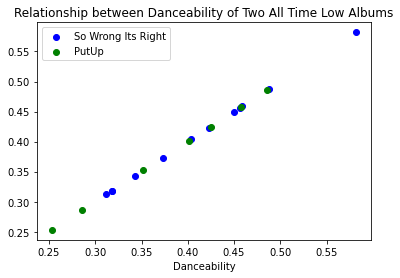

In [95]:
fig1, ax1 =plt.subplots()
putup_df = af[af['album'] == 'PutUp']
sowrong_df = af[af['album']== 'SoWrongItsRight']
ax1.scatter(sowrong_df['danceability'], sowrong_df['danceability'], label ='So Wrong Its Right', color = 'blue')
ax1.scatter(putup_df['danceability'], putup_df['danceability'], label = 'PutUp' , color = 'green')
ax1.set_xlabel('Danceability')
ax1.set_title('Relationship between Danceability of Two All Time Low Albums')
ax1.legend()
plt.show()

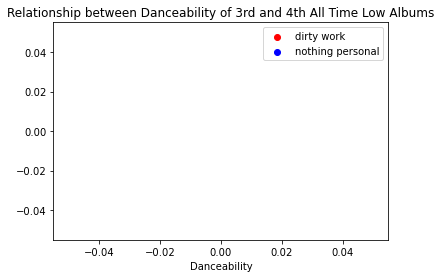

In [96]:
fig1, ax1 =plt.subplots()
nothingpersonal_df = af[af['album'] == 'nothing personal']
dirtywork_df = af[af['album']== 'dirty work']
ax1.scatter(dirtywork_df['danceability'], dirtywork_df['danceability'], label ='dirty work', color = 'red')
ax1.scatter(nothingpersonal_df['danceability'], nothingpersonal_df['danceability'], label = 'nothing personal' , color = 'blue')
ax1.set_xlabel('Danceability')
ax1.set_title('Relationship between Danceability of 3rd and 4th All Time Low Albums')
ax1.legend()
plt.show()

### I'm not sure why nothing is being shown here on the chart. I believe it has something to do with the reading of the csv. Is the csv information just strictly containing Put Up information and So Wrong Its Right?

### My goal is compare all the albums danceability and from the highest danceability of two two of them, I will graph the comparison. I plan on using bar plots, scatter plots and histograms. 